In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import OneHotEncoder
import os

In [39]:
df_img=[]
train_df="/kaggle/input/butterfly-image-classification/train"
for file in os.listdir(train_df):
    data=os.path.join(train_df,file)
    df_img.append(data)
df_img2=pd.DataFrame(np.array(df_img),columns=["img_column"])
df_img_file=np.array(df_img)

In [40]:
df_img_file

array(['/kaggle/input/butterfly-image-classification/train/Image_4378.jpg',
       '/kaggle/input/butterfly-image-classification/train/Image_5576.jpg',
       '/kaggle/input/butterfly-image-classification/train/Image_6267.jpg',
       ...,
       '/kaggle/input/butterfly-image-classification/train/Image_2577.jpg',
       '/kaggle/input/butterfly-image-classification/train/Image_4129.jpg',
       '/kaggle/input/butterfly-image-classification/train/Image_5780.jpg'],
      dtype='<U65')

In [3]:
df=pd.read_csv("/kaggle/input/butterfly-image-classification/Training_set.csv")
df_label=df.drop(columns=["filename"])
one_hot=OneHotEncoder(sparse_output=False)
one=one_hot.fit_transform(df_label[["label"]])
one=pd.DataFrame(one,columns=one_hot.get_feature_names_out())
one["img_col"]=df_img["img_column"]

In [4]:
df_label.nunique()

label    75
dtype: int64

In [5]:
one

,label_ADONIS,label_AFRICAN GIANT SWALLOWTAIL,label_AMERICAN SNOOT,label_AN 88,label_APPOLLO,label_ATALA,label_BANDED ORANGE HELICONIAN,label_BANDED PEACOCK,label_BECKERS WHITE,label_BLACK HAIRSTREAK,...,label_SOUTHERN DOGFACE,label_STRAITED QUEEN,label_TROPICAL LEAFWING,label_TWO BARRED FLASHER,label_ULYSES,label_VICEROY,label_WOOD SATYR,label_YELLOW SWALLOW TAIL,label_ZEBRA LONG WING,img_col
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/kaggle/input/butterfly-image-classification/t...
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/kaggle/input/butterfly-image-classification/t...
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/kaggle/input/butterfly-image-classification/t...
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/kaggle/input/butterfly-image-classification/t...
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/kaggle/input/butterfly-image-classification/t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/kaggle/input/butterfly-image-classification/t...
6495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/kaggle/input/butterfly-image-classification/t...
6496,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/kaggle/input/butterfly-image-classification/t...
6497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/kaggle/input/butterfly-image-classification/t...


In [6]:
datagen=ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2, 
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
    
)

In [7]:
one.columns

Index(['label_ADONIS', 'label_AFRICAN GIANT SWALLOWTAIL',
       'label_AMERICAN SNOOT', 'label_AN 88', 'label_APPOLLO', 'label_ATALA',
       'label_BANDED ORANGE HELICONIAN', 'label_BANDED PEACOCK',
       'label_BECKERS WHITE', 'label_BLACK HAIRSTREAK', 'label_BLUE MORPHO',
       'label_BLUE SPOTTED CROW', 'label_BROWN SIPROETA',
       'label_CABBAGE WHITE', 'label_CAIRNS BIRDWING',
       'label_CHECQUERED SKIPPER', 'label_CHESTNUT', 'label_CLEOPATRA',
       'label_CLODIUS PARNASSIAN', 'label_CLOUDED SULPHUR',
       'label_COMMON BANDED AWL', 'label_COMMON WOOD-NYMPH',
       'label_COPPER TAIL', 'label_CRECENT', 'label_CRIMSON PATCH',
       'label_DANAID EGGFLY', 'label_EASTERN COMA',
       'label_EASTERN DAPPLE WHITE', 'label_EASTERN PINE ELFIN',
       'label_ELBOWED PIERROT', 'label_GOLD BANDED', 'label_GREAT EGGFLY',
       'label_GREAT JAY', 'label_GREEN CELLED CATTLEHEART',
       'label_GREY HAIRSTREAK', 'label_INDRA SWALLOW', 'label_IPHICLUS SISTER',
       'label_JU

In [8]:
train_data=datagen.flow_from_dataframe(
dataframe=one,
x_col="img_col",
y_col=['label_ADONIS', 'label_AFRICAN GIANT SWALLOWTAIL',
       'label_AMERICAN SNOOT', 'label_AN 88', 'label_APPOLLO', 'label_ATALA',
       'label_BANDED ORANGE HELICONIAN', 'label_BANDED PEACOCK',
       'label_BECKERS WHITE', 'label_BLACK HAIRSTREAK', 'label_BLUE MORPHO',
       'label_BLUE SPOTTED CROW', 'label_BROWN SIPROETA',
       'label_CABBAGE WHITE', 'label_CAIRNS BIRDWING',
       'label_CHECQUERED SKIPPER', 'label_CHESTNUT', 'label_CLEOPATRA',
       'label_CLODIUS PARNASSIAN', 'label_CLOUDED SULPHUR',
       'label_COMMON BANDED AWL', 'label_COMMON WOOD-NYMPH',
       'label_COPPER TAIL', 'label_CRECENT', 'label_CRIMSON PATCH',
       'label_DANAID EGGFLY', 'label_EASTERN COMA',
       'label_EASTERN DAPPLE WHITE', 'label_EASTERN PINE ELFIN',
       'label_ELBOWED PIERROT', 'label_GOLD BANDED', 'label_GREAT EGGFLY',
       'label_GREAT JAY', 'label_GREEN CELLED CATTLEHEART',
       'label_GREY HAIRSTREAK', 'label_INDRA SWALLOW', 'label_IPHICLUS SISTER',
       'label_JULIA', 'label_LARGE MARBLE', 'label_MALACHITE',
       'label_MANGROVE SKIPPER', 'label_MESTRA', 'label_METALMARK',
       'label_MILBERTS TORTOISESHELL', 'label_MONARCH', 'label_MOURNING CLOAK',
       'label_ORANGE OAKLEAF', 'label_ORANGE TIP', 'label_ORCHARD SWALLOW',
       'label_PAINTED LADY', 'label_PAPER KITE', 'label_PEACOCK',
       'label_PINE WHITE', 'label_PIPEVINE SWALLOW', 'label_POPINJAY',
       'label_PURPLE HAIRSTREAK', 'label_PURPLISH COPPER',
       'label_QUESTION MARK', 'label_RED ADMIRAL', 'label_RED CRACKER',
       'label_RED POSTMAN', 'label_RED SPOTTED PURPLE', 'label_SCARCE SWALLOW',
       'label_SILVER SPOT SKIPPER', 'label_SLEEPY ORANGE', 'label_SOOTYWING',
       'label_SOUTHERN DOGFACE', 'label_STRAITED QUEEN',
       'label_TROPICAL LEAFWING', 'label_TWO BARRED FLASHER', 'label_ULYSES',
       'label_VICEROY', 'label_WOOD SATYR', 'label_YELLOW SWALLOW TAIL',
       'label_ZEBRA LONG WING'],
target_size=(256,256),
batch_size=32,
class_mode="raw",
subset="training"
# class_model=None,
)

Found 5200 validated image filenames.


In [9]:
val_data=datagen.flow_from_dataframe(
dataframe=one,
x_col="img_col",
y_col=['label_ADONIS', 'label_AFRICAN GIANT SWALLOWTAIL',
       'label_AMERICAN SNOOT', 'label_AN 88', 'label_APPOLLO', 'label_ATALA',
       'label_BANDED ORANGE HELICONIAN', 'label_BANDED PEACOCK',
       'label_BECKERS WHITE', 'label_BLACK HAIRSTREAK', 'label_BLUE MORPHO',
       'label_BLUE SPOTTED CROW', 'label_BROWN SIPROETA',
       'label_CABBAGE WHITE', 'label_CAIRNS BIRDWING',
       'label_CHECQUERED SKIPPER', 'label_CHESTNUT', 'label_CLEOPATRA',
       'label_CLODIUS PARNASSIAN', 'label_CLOUDED SULPHUR',
       'label_COMMON BANDED AWL', 'label_COMMON WOOD-NYMPH',
       'label_COPPER TAIL', 'label_CRECENT', 'label_CRIMSON PATCH',
       'label_DANAID EGGFLY', 'label_EASTERN COMA',
       'label_EASTERN DAPPLE WHITE', 'label_EASTERN PINE ELFIN',
       'label_ELBOWED PIERROT', 'label_GOLD BANDED', 'label_GREAT EGGFLY',
       'label_GREAT JAY', 'label_GREEN CELLED CATTLEHEART',
       'label_GREY HAIRSTREAK', 'label_INDRA SWALLOW', 'label_IPHICLUS SISTER',
       'label_JULIA', 'label_LARGE MARBLE', 'label_MALACHITE',
       'label_MANGROVE SKIPPER', 'label_MESTRA', 'label_METALMARK',
       'label_MILBERTS TORTOISESHELL', 'label_MONARCH', 'label_MOURNING CLOAK',
       'label_ORANGE OAKLEAF', 'label_ORANGE TIP', 'label_ORCHARD SWALLOW',
       'label_PAINTED LADY', 'label_PAPER KITE', 'label_PEACOCK',
       'label_PINE WHITE', 'label_PIPEVINE SWALLOW', 'label_POPINJAY',
       'label_PURPLE HAIRSTREAK', 'label_PURPLISH COPPER',
       'label_QUESTION MARK', 'label_RED ADMIRAL', 'label_RED CRACKER',
       'label_RED POSTMAN', 'label_RED SPOTTED PURPLE', 'label_SCARCE SWALLOW',
       'label_SILVER SPOT SKIPPER', 'label_SLEEPY ORANGE', 'label_SOOTYWING',
       'label_SOUTHERN DOGFACE', 'label_STRAITED QUEEN',
       'label_TROPICAL LEAFWING', 'label_TWO BARRED FLASHER', 'label_ULYSES',
       'label_VICEROY', 'label_WOOD SATYR', 'label_YELLOW SWALLOW TAIL',
       'label_ZEBRA LONG WING'],
target_size=(256,256),
batch_size=32,
class_mode="raw",
subset="validation"
# class_model=None,
)

Found 1299 validated image filenames.


In [10]:
img,label=next(train_data)

In [11]:
img.shape

(32, 256, 256, 3)

In [12]:
label.shape

(32, 75)

# # Deep learning

In [13]:
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,BatchNormalization,Input,Dropout
from keras.models import Model
from keras.initializers import HeNormal
from keras.regularizers import l2 
from keras.callbacks import EarlyStopping

In [14]:
early_stopping=EarlyStopping(
monitor='val_loss',
patience=5,
verbose=1)

In [18]:
inputs=Input(shape=(256,256,3))
C=Conv2D(32,(3,3),activation='relu',padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(inputs)
D=Dropout(0.5)(C)
B=BatchNormalization()(D)
C=Conv2D(64,(3,3),activation='relu',padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(B)
D=Dropout(0.5)(C)
B=BatchNormalization()(D)

M=MaxPooling2D(2,2)(B)
C=Conv2D(128,(3,3),activation='relu',padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(M)
D=Dropout(0.5)(C)
B=BatchNormalization()(D)
C=Conv2D(556,(3,3),activation='relu',padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(B)
D=Dropout(0.5)(C)
B=BatchNormalization()(D)

M=MaxPooling2D(2,2)(B)
F=Flatten()(M)
D=Dense(32,activation="relu")(F)
outputs=Dense(75,activation="softmax")(D)
model=Model(inputs,outputs)
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256, 256, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 256, 256, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256, 256, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 256, 256, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128, 128, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 128, 128, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 128, 128, 556)  │       641,068 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128, 128, 556)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 128, 128, 556)  │         2,224 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 64, 64, 556)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2277376)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │    72,876,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 75)             │         2,475 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,615,975 (280.82 MB)

 Trainable params: 73,614,415 (280.82 MB)

 Non-trainable params: 1,560 (6.09 KB)

In [19]:
model.fit(train_data,epochs=50,validation_data=val_data,callbacks=[early_stopping])

Epoch 1/50


2024-09-28 06:05:27.344188: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[64,32,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,32,256,256]{3,2,1,0}, f32[32,64,256,256]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2024-09-28 06:05:27.893366: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.549308317s
Trying algorithm eng0{} for conv (f32[64,32,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,32,256,256]{3,2,1,0}, f32[32,64,256,256]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_con

163/163 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - accuracy: 0.0150 - loss: 103.3908 - val_accuracy: 0.0131 - val_loss: 43.5208
Epoch 2/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 117s 689ms/step - accuracy: 0.0121 - loss: 15.2006 - val_accuracy: 0.0154 - val_loss: 207.8998
Epoch 3/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 116s 686ms/step - accuracy: 0.0150 - loss: 11.5511 - val_accuracy: 0.0139 - val_loss: 275.0853
Epoch 4/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 118s 700ms/step - accuracy: 0.0156 - loss: 9.2052 - val_accuracy: 0.0115 - val_loss: 326.6125
Epoch 5/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 116s 688ms/step - accuracy: 0.0170 - loss: 7.7375 - val_accuracy: 0.0092 - val_loss: 376.9930
Epoch 6/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 115s 682ms/step - accuracy: 0.0192 - loss: 6.8072 - val_accuracy: 0.0092 - val_loss: 408.2145
Epoch 6: early stopping


# # m2

In [22]:
inputs2=Input(shape=(256,256,3))
C=Conv2D(32,(3,3),activation='relu',padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(inputs2)
D=Dropout(0.5)(C)
B=BatchNormalization()(D)
C=Conv2D(32,(3,3),activation='relu',padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(B)
D=Dropout(0.5)(C)
B=BatchNormalization()(D)

M=MaxPooling2D(2,2)(B)
C=Conv2D(64,(3,3),activation='relu',padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(M)
D=Dropout(0.5)(C)
B=BatchNormalization()(D)
C=Conv2D(64,(3,3),activation='relu',padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(B)
D=Dropout(0.5)(C)
B=BatchNormalization()(D)

M=MaxPooling2D(2,2)(B)
C=Conv2D(128,(3,3),activation='relu',padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(M)
D=Dropout(0.5)(C)
B=BatchNormalization()(D)
C=Conv2D(128,(3,3),activation='relu',padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(B)
D=Dropout(0.5)(C)
B=BatchNormalization()(D)

M=MaxPooling2D(2,2)(B)
C=Conv2D(256,(3,3),activation='relu',padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(M)
D=Dropout(0.5)(C)
B=BatchNormalization()(D)
C=Conv2D(256,(3,3),activation='relu',padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(B)
D=Dropout(0.5)(C)
B=BatchNormalization()(D)

M=MaxPooling2D(2,2)(B)
F=Flatten()(M)
D=Dense(32,activation="relu")(F)
outputs2=Dense(75,activation="softmax")(D)
model2=Model(inputs2,outputs2)
model2.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])
model2.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 256, 256, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 256, 256, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 256, 256, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 32, 32, 128)    │             

 Total params: 3,275,755 (12.50 MB)

 Trainable params: 3,273,835 (12.49 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [ ]:
model2.fit(train_data,epochs=50,validation_data=val_data,callbacks=[early_stopping])

In [ ]:
Epoch 1/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 162s 809ms/step - accuracy: 0.0149 - loss: 18.4776 - val_accuracy: 0.0115 - val_loss: 82.6014
Epoch 2/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 114s 674ms/step - accuracy: 0.0179 - loss: 7.8047 - val_accuracy: 0.0208 - val_loss: 7.5921
Epoch 3/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 113s 672ms/step - accuracy: 0.0202 - loss: 6.4946 - val_accuracy: 0.0123 - val_loss: 26.9379
Epoch 4/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 114s 675ms/step - accuracy: 0.0209 - loss: 5.6034 - val_accuracy: 0.0192 - val_loss: 7.3742
Epoch 5/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 113s 672ms/step - accuracy: 0.0193 - loss: 5.6892 - val_accuracy: 0.0154 - val_loss: 85.9533
Epoch 6/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 114s 678ms/step - accuracy: 0.0196 - loss: 5.1044 - val_accuracy: 0.0115 - val_loss: 41.4425
Epoch 7/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 115s 679ms/step - accuracy: 0.0231 - loss: 4.8529 - val_accuracy: 0.0154 - val_loss: 7.4089
Epoch 8/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 114s 675ms/step - accuracy: 0.0208 - loss: 4.7082 - val_accuracy: 0.0231 - val_loss: 4.7196
Epoch 9/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 114s 676ms/step - accuracy: 0.0197 - loss: 4.6117 - val_accuracy: 0.0216 - val_loss: 4.5670
Epoch 10/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 114s 678ms/step - accuracy: 0.0231 - loss: 4.5415 - val_accuracy: 0.0216 - val_loss: 4.5085
Epoch 11/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 114s 675ms/step - accuracy: 0.0214 - loss: 4.4911 - val_accuracy: 0.0177 - val_loss: 4.4736
Epoch 12/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 115s 680ms/step - accuracy: 0.0216 - loss: 4.4528 - val_accuracy: 0.0085 - val_loss: 5.2995
Epoch 13/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 115s 682ms/step - accuracy: 0.0202 - loss: 4.4233 - val_accuracy: 0.0146 - val_loss: 4.4840
Epoch 14/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 115s 683ms/step - accuracy: 0.0201 - loss: 4.3985 - val_accuracy: 0.0216 - val_loss: 4.3926
Epoch 15/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 115s 680ms/step - accuracy: 0.0217 - loss: 4.3824 - val_accuracy: 0.0216 - val_loss: 4.3774
Epoch 16/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 114s 677ms/step - accuracy: 0.0183 - loss: 4.3673 - val_accuracy: 0.0216 - val_loss: 4.3653
Epoch 17/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 114s 674ms/step - accuracy: 0.0172 - loss: 4.3562 - val_accuracy: 0.0216 - val_loss: 4.3556
Epoch 18/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 114s 673ms/step - accuracy: 0.0184 - loss: 4.3461 - val_accuracy: 0.0216 - val_loss: 4.3479

In [25]:
!pip install rembg

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 92.0 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.0 MB/s eta 0:00:00


In [33]:
d=Image.open("/kaggle/working/removed_background_image.png")

In [34]:
import matplotlib.pyplot as plt

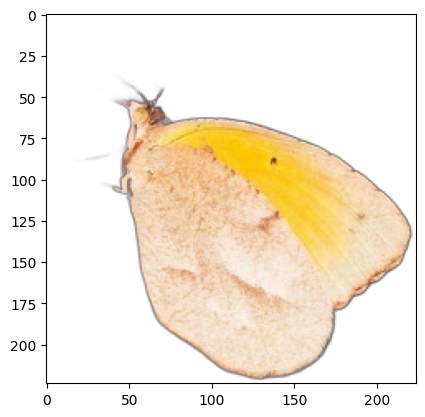

In [36]:
plt.imshow(output_image)
plt.show()

In [ ]:
from rembg import remove
from PIL import Image
new_img_data=[]
for img in df_img_file:
    img_data=Image.open(img)
    img_remove=remove(img_data)
    new_img_data.append(img_remove)

In [ ]:
new_img_data